### This Notebbok is for the XGBoost Model

In [176]:
# load libraries & dataset
import pandas as pd
import numpy as np

# Data
df = pd.read_csv('Training_Dataset.csv')
df.head()

,Latitude,Longitude,Sample Date,nir,green,swir16,swir22,NDMI,MNDWI,pet,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus
0,-28.760833,17.730278,02-01-2011,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,174.2,128.912,555.0,10.0
1,-26.861111,28.884722,03-01-2011,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,124.1,74.720,162.9,163.0
2,-26.450000,28.085833,03-01-2011,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,127.5,89.254,573.0,80.0
3,-27.671111,27.236944,03-01-2011,14887.0,10943.0,13522.0,11403.0,0.048048,-0.105416,129.7,82.000,203.6,101.0
4,-27.356667,27.286389,03-01-2011,16828.5,9502.5,12665.5,9643.0,0.141147,-0.142683,129.2,56.100,145.1,151.0


           Total Alkalinity  Electrical Conductance  \
Latitude           0.318495                0.115727   
NDMI              -0.274070               -0.177506   
pet                0.263515                0.322811   
swir22             0.211446                0.159797   
swir16             0.191913                0.144659   
MNDWI             -0.154614               -0.141569   
green              0.061622                0.028293   
Longitude          0.036686               -0.213808   
nir                0.015579                0.037289   

           Dissolved Reactive Phosphorus  
Latitude                        0.257010  
NDMI                           -0.085012  
pet                             0.062566  
swir22                          0.065900  
swir16                          0.059861  
MNDWI                          -0.048319  
green                           0.008321  
Longitude                       0.022743  
nir                            -0.004762  


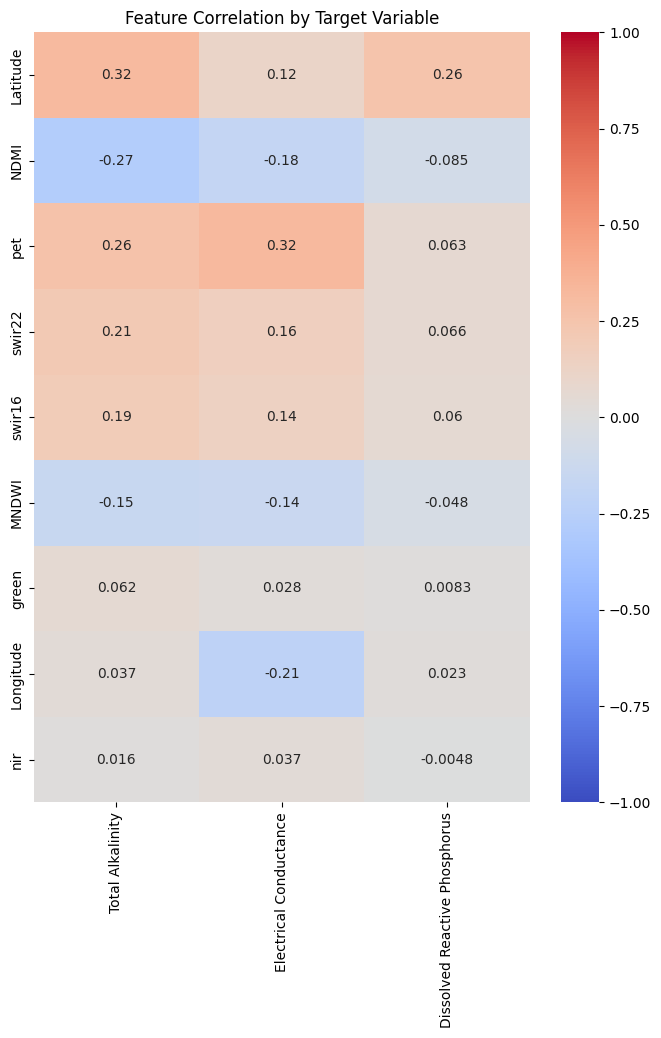

In [177]:
# Checking the correlation of each target variable to the rest of the data
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop(columns=['Sample Date'])

# 1. Define your targets and features
targets = ['Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus']

# 2. Calculate the full correlation matrix
corr_matrix = df.corr()

# 3. Filter to show ONLY how features correlate with your targets
# We drop the targets from the rows so we don't see them correlating with themselves
target_correlations = corr_matrix[targets].drop(index=targets)

# 4. Sort by 'Total Alkalinity' (or any target) to organize the view
target_correlations = target_correlations.sort_values(by='Total Alkalinity', ascending=False, key=abs)

# 5. Display the numbers
print(target_correlations)

# 6. (Optional) Visual Heatmap for quick scanning
plt.figure(figsize=(8, 10))
sns.heatmap(target_correlations, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Feature Correlation by Target Variable")
plt.show()

In [178]:
# Feature Engineering using the longitude and latitude columns to build a spatial cluster feature
from sklearn.cluster import KMeans

# 1. Create a Spatial Cluster feature
kmeans = KMeans(n_clusters=5, random_state=42)
df['region_cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Check the new dataset
df.head()

,Latitude,Longitude,nir,green,swir16,swir22,NDMI,MNDWI,pet,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus,region_cluster
0,-28.760833,17.730278,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,174.2,128.912,555.0,10.0,1
1,-26.861111,28.884722,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,124.1,74.720,162.9,163.0,0
2,-26.450000,28.085833,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,127.5,89.254,573.0,80.0,0
3,-27.671111,27.236944,14887.0,10943.0,13522.0,11403.0,0.048048,-0.105416,129.7,82.000,203.6,101.0,0
4,-27.356667,27.286389,16828.5,9502.5,12665.5,9643.0,0.141147,-0.142683,129.2,56.100,145.1,151.0,0


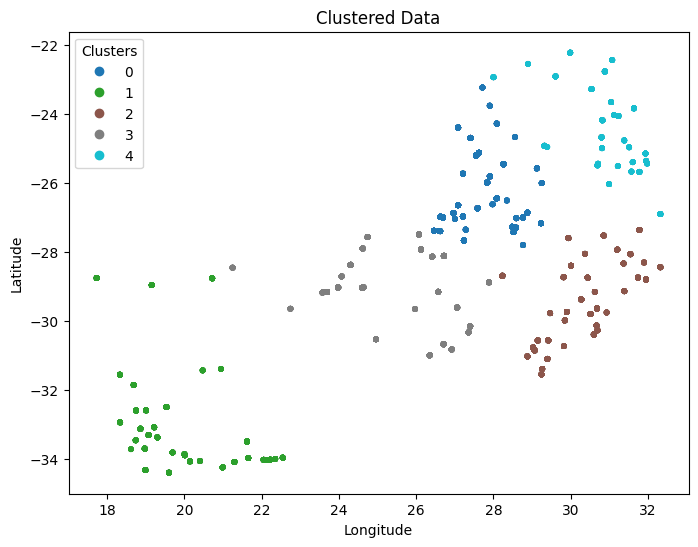

In [179]:
plt.figure(figsize=(8, 6))

# Assign the plot to a variable 'scatter'
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                      c=df['region_cluster'], cmap='tab10', s=10)

plt.title("Clustered Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Use legend_elements to automatically generate handles and labels
plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

In [180]:
# Drop the Longitude column
df = df.drop(columns = ['Longitude'])
df.head()

,Latitude,nir,green,swir16,swir22,NDMI,MNDWI,pet,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus,region_cluster
0,-28.760833,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,174.2,128.912,555.0,10.0,1
1,-26.861111,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,124.1,74.720,162.9,163.0,0
2,-26.450000,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,127.5,89.254,573.0,80.0,0
3,-27.671111,14887.0,10943.0,13522.0,11403.0,0.048048,-0.105416,129.7,82.000,203.6,101.0,0
4,-27.356667,16828.5,9502.5,12665.5,9643.0,0.141147,-0.142683,129.2,56.100,145.1,151.0,0


In [181]:
df.isna().sum()

Latitude                            0
nir                              1085
green                            1085
swir16                           1085
swir22                           1085
NDMI                             1085
MNDWI                            1085
pet                                 0
Total Alkalinity                    0
Electrical Conductance              0
Dissolved Reactive Phosphorus       0
region_cluster                      0
dtype: int64

### Filling The missing Values

In [182]:
# Define the x and y variables
targets = df[['Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus']]
X = df.drop(columns = targets)
X.head()

,Latitude,nir,green,swir16,swir22,NDMI,MNDWI,pet,region_cluster
0,-28.760833,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,174.2,1
1,-26.861111,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,124.1,0
2,-26.450000,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,127.5,0
3,-27.671111,14887.0,10943.0,13522.0,11403.0,0.048048,-0.105416,129.7,0
4,-27.356667,16828.5,9502.5,12665.5,9643.0,0.141147,-0.142683,129.2,0


In [183]:
X.describe()

,Latitude,nir,green,swir16,swir22,NDMI,MNDWI,pet,region_cluster
count,9319.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,9319.000000,9319.000000
mean,-28.474988,14045.485426,9983.213141,13567.459315,11425.538377,0.021374,-0.144268,175.166082,1.433630
std,2.760282,2953.223626,2778.780177,3348.517657,2548.193535,0.077897,0.097646,29.469867,1.349787
min,-34.405833,3992.000000,4045.000000,3672.500000,3634.000000,-0.328293,-0.300487,52.700000,0.000000
25%,-30.160091,12723.625000,9370.000000,11760.625000,9839.500000,-0.036869,-0.211270,156.100000,0.000000
50%,-28.058889,14183.000000,9801.000000,13704.250000,11265.250000,0.021549,-0.167901,172.500000,1.000000
75%,-26.861111,15513.875000,10286.000000,15425.625000,12895.500000,0.073297,-0.104677,193.100000,3.000000
max,-22.225556,65535.000000,65535.000000,65535.000000,31202.500000,0.567905,0.590974,270.800020,4.000000


In [184]:
# Replace the 65535 entries with NaN
X = X.replace(65535, np.nan)
X.isna().sum()

Latitude             0
nir               1086
green             1098
swir16            1087
swir22            1085
NDMI              1085
MNDWI             1085
pet                  0
region_cluster       0
dtype: int64

In [185]:
# SCale and fill the missing values using KNNImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Scale
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# Impute
imputer = KNNImputer(n_neighbors = 10)
imputed_data = imputer.fit_transform(scaled_data)

X = imputed_data


In [186]:
# Define the y variables seprately
y_TA = targets['Total Alkalinity']
y_EC = targets['Electrical Conductance']
y_DRP = targets['Dissolved Reactive Phosphorus']

#### Modeling & Evaluation

##### Total Alkalinity

In [187]:
# Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

# Split the data into 70-30 set
X_train, X_test, y_train, y_test = train_test_split(X, y_TA, random_state = 42, test_size = 0.2)

# Fit and train the model
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, learning_rate = 0.1, max_depth = 6)
model = xgb_model.fit(X_train, y_train)

# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)

print('Total Alkalinity\n')
print(f'TRAINING SET:\n R² : {train_r2:.3f}\n RMSE : {train_rmse:.3f}\n')
print(f'TEST SET:\n R² : {test_r2:.3f}\n RMSE : {test_rmse:.3f}')


Total Alkalinity

TRAINING SET:
 R² : 0.955
 RMSE : 15.788

TEST SET:
 R² : 0.818
 RMSE : 32.380


#### Electrical Conductance

In [188]:
# Split the data into 70-30 set
X_train, X_test, y_train, y_test = train_test_split(X, y_EC, random_state = 42, test_size = 0.2)

# Fit and train the model
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, learning_rate = 0.1, max_depth = 6)
model = xgb_model.fit(X_train, y_train)

# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)

print('Electrical Conductance\n')
print(f'TRAINING SET:\n R² : {train_r2:.3f}\n RMSE : {train_rmse:.3f}\n')
print(f'TEST SET:\n R² : {test_r2:.3f}\n RMSE : {test_rmse:.3f}')

Electrical Conductance

TRAINING SET:
 R² : 0.964
 RMSE : 64.767

TEST SET:
 R² : 0.845
 RMSE : 135.842


#### Dissolved Reactive Phosphorus

In [189]:
# Split the data into 70-30 set
X_train, X_test, y_train, y_test = train_test_split(X, y_DRP, random_state = 42, test_size = 0.2)

# Fit and train the model
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, learning_rate = 0.1, max_depth = 6)
model = xgb_model.fit(X_train, y_train)

# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)

print('Dissolved Reactive Phosphorus\n')
print(f'TRAINING SET:\n R² : {train_r2:.3f}\n RMSE : {train_rmse:.3f}\n')
print(f'TEST SET:\n R² : {test_r2:.3f}\n RMSE : {test_rmse:.3f}')

Dissolved Reactive Phosphorus

TRAINING SET:
 R² : 0.916
 RMSE : 14.720

TEST SET:
 R² : 0.684
 RMSE : 29.132
